# Advanced Project: Long Run
## Implementing the Romer Model


In [2]:
# Insert the Python Libraries You Will Need Here:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Q1) Implementing the Romer Model using Python

Unlike the Solow Model, the Romer model incorporates the difference between ideas and ojects into the model. Ideas play a big role in sustained growth as illustrated by this homework.

### Part I

| Description                        | Mathematical Expression|
|---|---|
| Unknowns/endogenous variables:     | $Y_t$, $A_t$, $L_{yt}$, $L_{at}$           | 
| Output Production Function:        | $Y_t = A_t L_{yt}$                         |
| Idea Production Function:          | $\Delta A_{t+1}=\bar{z} A_tL_{at}$         |
| Resource Constraint:               | $L_{yt}+L_{at}=\bar{L}$                    |
| Allocation of Labor:               | $L_{at} = \bar{\ell}\bar{L}$               |
| Parameters:                        | $\bar{z}, \bar{L}, \bar{\ell}, \bar{A_0}$  |

Suppose the parameters of the Romer model take the following values: $\bar{A_0} = 100$, $\bar{\ell} = 0.10$, $\bar{z} = \frac{1}{500}$, and $\bar{L} = 100$. The growth rate of output per person is constant and equal to $\bar{g} = \bar{z}\bar{\ell}\bar{L}$ (pg. 151 of textbook). Therefore, 

\begin{align*}
\bar{g} &= \bar{z}\bar{\ell}\bar{L}\\
&= \left(\frac{1}{500}\right)(0.10)(100)\\
&= .02
\end{align*}



The initial level of output per person is $Y_0 =90$

__(a):__ Use the Romer framework to model output per person over 80 years and make two time series plots, one in the level scale and another using the logarithmic (ratio) scale.

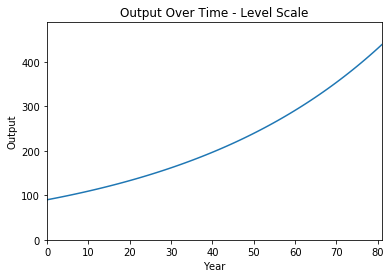

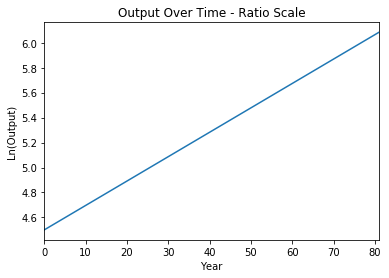

In [21]:
# Model Parameters

A0 = 100
l_bar = 0.1
z_bar = 1/500
L_bar = 100


# Use a lambda function for output and call it using a for loop
# Defining the lambda function. This is the same as using def but shorter.
# Using a lambda function is great for short formulas.

output = lambda A0, z_bar, l_bar, L_bar, t: A0 * (1 - l_bar) * ((1 + z_bar*L_bar*l_bar)**t)


##############################################################################
# Make a for loop to calculate the production for each year

output_array = np.zeros(81) # An array full of zeros, this is storage for data in the loop

# Using a for loop to calcuate the rest of the years 1-81. 
# Remember when using range(0:81) endpoints are not included, thus it will not reach year 80 unless you 
# write the loop in the range(0, 81)


for i in range(0,81):
    t = i
    output_array[i] = output(A0, z_bar, l_bar, L_bar, t)


# Make the plots

year = np.linspace(0, 81, 81) #creates a nice array for the year

plt.plot(year, output_array)
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Level Scale')
plt.ylim(0, np.max(output_array)+50)  
plt.xlim(0, year.size) 
plt.show()


plt.plot(year, np.log(output_array))
plt.xlabel('Year')
plt.ylabel('Ln(Output)')
plt.title('Output Over Time - Ratio Scale')
plt.xlim(0, year.size) 
plt.show()


__(b):__ Suppose the share or workers dedicated to research were to double at $t=40$. Please find the growth rate of output and initial output level using this new information. Add this change to the graphs of part (a). You will now have two 80-year paths for each variable on one plot. Make sure your time series for this question has a different color and that your plot includes a legend indicating which parameter values belong to which variable path. Please discuss the effect on output generated by the change in the allocation of labor in this economy.

The initial growth rate at t=0 is 2%
The new growth rate would be at t=50: 4.00%
Inital Level of Output:  90.0


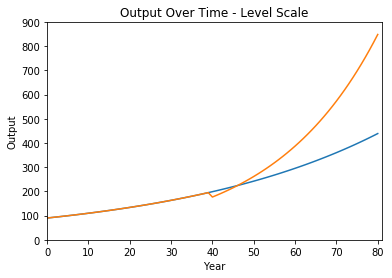

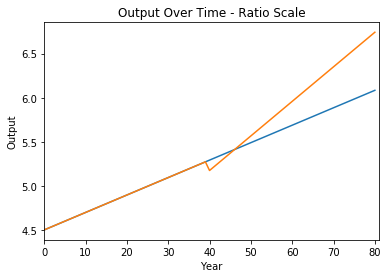

In [22]:
# Defining new research labor share

l_bar2 = (l_bar * 2) 

##########################################################################
# Part (a): find the growth rate
##########################################################################

g_bar2 = z_bar * l_bar2 * L_bar

print('The initial growth rate at t=0 is 2%')
print('The new growth rate would be at t=50:', '{0:.2%}'.format(g_bar2))

##########################################################################
# Part (b): The initial level of output per person
##########################################################################

print('Inital Level of Output: ', output(A0, z_bar, l_bar, L_bar, 0))

##########################################################################
# Part (c): Make a plot of 80 years of output
##########################################################################

# Allocate new array
output_array2 = np.zeros(81)

# To simulate the change in the research share we have to be very careful about timing.
# At period 40 the research share will change the level of output immediately. It will
# also change the growth rate of output from period 40 onward.  In essence it creates 
# another time series, independent from the previous one. Instead of creating
# two time series and joining them like I did in the Solow Model I've used
# an 'if' statment inside of the loop. It's business as usual from periods 1-39. However
# in period 40 the research share changes both the level of output, and the growth rate of output.
# Note I kept the value of TFP fom period 40 to start the new series.

for i in range(0, 81):
    t = i
    if t < 40:
        output_array2[i] = output(A0, z_bar, l_bar, L_bar, t)
    else:
        A40 = A0 * (1+l_bar * L_bar * z_bar) ** 40
        output_array2[i] = output(A40, z_bar, l_bar2, L_bar, t-40)


# Make the plots

year = np.arange(0, output_array.size, 1) # This is just used to make a nice array for the x axis       

plt.plot(year, output_array, label = 'Growth = 2%')
plt.plot(year, output_array2, label = 'Growth = 4%')
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Level Scale')
plt.ylim(0, np.max(output_array2)+50)  
plt.xlim(0, year.size) 
plt.show()

plt.plot(year, np.log(output_array), label = 'Growth = 2%')
plt.plot(year, np.log(output_array2))
plt.xlabel('Year')
plt.ylabel('Output')
plt.title('Output Over Time - Ratio Scale')
plt.xlim(0, year.size) 
plt.show()


__Answer__ 

There are two effects, a level effect at the year of the change and a growth effect for every year afterwards. The level effect, although significant, pales in comparison to the eventual total effect that a doubling of the rate of growth of output has on the level of output. The amount of output sacrificed during year 40 is rougly -22. The ending output difference between the two scenarios is 409. Adding up all the years, both of sacrificed outpupt and gained output we end up with a balance of 5,191.59. So, changing the rate of growth of TFP was absolutely worth it! (See calculations below) 

Output sacrificed during period 50:
    Output Difference
40         -22.080397
Output gained at the end of 50 years, period 100:
    Output Difference
80         409.277994
Cumulative output gain:
5,191.59


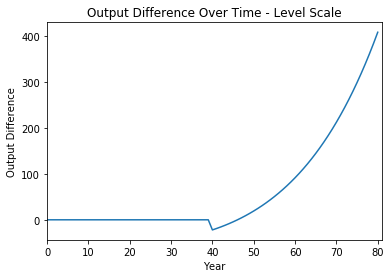

In [23]:
# Create a dataframe that contains the difference between the output values for the time-series
# without the policy change and the time-series with the policy change.

df = pd.DataFrame({'Time':t, 
                   'Output Difference':output_array2-output_array}, 
                    columns=['Time', 'Output Difference'])


# Calculating the values mentioned in the answer above.
print('Output sacrificed during period 50:')
print(df.loc[[40], ['Output Difference']])
print('Output gained at the end of 50 years, period 100:')
print(df.loc[[80], ['Output Difference']])
print('Cumulative output gain:')
print('{:,.2f}'.format(df['Output Difference'].sum()))


# Here is a plot of the output difference between the original time-series and the time-series
# with the policy change.

plt.plot(df.loc[:,'Output Difference'])
plt.xlabel('Year')
plt.ylabel('Output Difference')
plt.title('Output Difference Over Time - Level Scale')
plt.xlim(0, year.size) 
plt.show()

### Part II

Now suppose the parameters of the model take the following values $\bar{A_0} = 100$, $\bar{\ell} = 0.06$, $\bar{z} = \frac{1}{3000}$, and $\bar{L} = 1000$. Use Python to answer __(a)__ through __(c)__.

__(a):__ What is the growth rate of output per person in this economy? What is the initial level of output per person?

__(b):__  Use the Romer framework to model output per person over 80 years and make a time series plot using the _levels_ scale.

__(c):__ Now add to your plot from part __(b)__ the following changes one at a time: a doubling of the stock of knowledge $\bar{A}_{20}$ at $t=20$, an increase of the research share $\bar{\ell}$ by 150% at $t=30$, double the research productivity $\bar{z}$ at $t=40$, and a doubling of the population $\bar{L}$ at $t=60$. You should now have a total of 5 separate time series on the same plot. Make sure each line has a different color and your plot has a legend indicating which path represents which change. Please, make sure to include the growth rate of output per person after the change in the legend for each scenario.

__(d):__ Now you have a framework to conduct quantitative experiments at different time frames with different variables. Play around with each event and suggest which change to the model would result in the greatest gain for an economy in the long run. Make sure to back up your claims with numbers!

## Q2) Intellectual property products (a FRED question)

In 2015, the U.S. National Income Accounts began to "count" intellectual property products—such as R&D, computer software, books, music, and movies—explicitly as investment. More correctly, they had previously assumed these products were an intermediate good that depreciated fully when used to produce some other final good, but now they are included as a part of investment and GDP. Examine the data on investment in intellectual property products (IPP).

**(a)** Create a time series plot that shows the research share over time.  Please use the code from the Chapter 07 Homework __Q1)__ as a guide.

In [4]:
# url: 'https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/Y001RE1Q156NBEA.csv',


__(b):__ What has happened to the share of GDP devoted to investment in IPP over the last 60 years. What might explain this change?

__(c):__ Lets use the share of GDP devoted to investment in IPP as a proxy for the amount of labor effort that goes into research and development in a country, or $\bar{\ell}$. The assumption in the Romer model is that the research share is constant. Please relax this assumption and incorporate a dynamic research share parameter $\bar{\ell}_{t}$ into the Romer model. Use the data you obtained in part __(b)__ to create a series for your new dynamic variable $\bar{\ell}_{t}$ and simluate all 287 quarters of data found in the of data using $\bar{A_0} = 100$, $\bar{z} = \frac{1}{3000}$, $\alpha=1/3$ and $\bar{L} = 1000$. Please create a plot of GDP per capita and the growth of GPD per capita over the post WWII era.

__(d)__ Compare the growth rate of GDP per capita under this new assumption versus the fixed parameter version of the model.  What are the strenghts and weaknesses of each model? Please justify your answers.